# Testing EEG Model Classifications
Dataset https://www.kaggle.com/datasets/wajahat1064/emotion-recognition-using-eeg-and-computer-games/data

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt




In [13]:
data = pd.read_csv("C:\eeg\camp_qmind\S01G1AllChannels.csv")
data.head(4)

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\234457362.py:1: SyntaxWarning: invalid escape sequence '\e'
  data = pd.read_csv("C:\eeg\camp_qmind\S01G1AllChannels.csv")


,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14
0,-33.0205,-15.1846,-42.1795,1.6872,42.1793,-1.68720,-5.5436,-3.6154,25.7899,-9.8819,5.5436,7.47180,11.8101,17.1128,NaN
1,-28.6291,-20.0583,-42.5410,-10.4653,35.3100,-15.68600,-19.3110,-2.4344,17.4933,3.2442,18.7081,5.09510,17.3683,3.0708,NaN
2,-21.8497,-10.9006,-32.0346,-2.3656,39.6993,-0.64483,-4.0523,-1.0830,26.8081,-3.4584,8.1861,8.40480,15.1209,9.3940,NaN
3,-25.1185,-10.9702,-32.7641,-3.4287,32.7378,4.69650,-8.6299,-1.7412,16.7637,-9.7586,1.1868,0.91086,4.3315,8.1073,NaN


In [14]:
stats_summary = data.describe()
stats_summary

,AF3,AF4,F3,F4,F7,F8,FC5,FC6,O1,O2,P7,P8,T7,T8,Unnamed: 14
count,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,38252.000000,0.0
mean,0.013611,0.006082,0.004386,-0.006251,-0.005188,-0.021498,-0.016589,0.015937,-0.029628,0.005387,0.000706,0.001598,0.032812,-0.006881,NaN
std,10.152945,11.071779,14.352935,13.747399,25.978797,13.743485,16.210359,14.471805,18.637859,17.867029,21.587647,11.499994,14.924300,12.084201,NaN
min,-46.013900,-71.382200,-104.268500,-94.795000,-234.664500,-86.228000,-83.861800,-75.213300,-104.469600,-87.812700,-143.605700,-66.375800,-70.475300,-57.277100,NaN
25%,-6.483925,-6.416525,-7.940150,-8.376975,-8.812925,-9.363550,-10.079800,-9.604250,-10.621125,-11.378100,-13.007825,-7.178325,-9.210325,-7.917775,NaN
50%,-0.218545,-0.227875,-0.302535,0.060477,-0.011204,-0.045357,0.090598,-0.143080,-0.109125,-0.035530,-0.043945,-0.200560,-0.055330,0.235105,NaN
75%,6.445850,6.542250,8.084525,8.463400,8.705750,9.219000,10.104950,9.721700,10.361400,11.516325,12.806325,7.072225,9.186625,8.148350,NaN
max,52.488800,46.643200,208.565200,77.857900,234.889100,69.991000,159.357800,96.310000,114.401500,87.487600,185.011600,55.629000,114.101300,56.314400,NaN


# Clean data
Remove null values, etc.

In [15]:
data = data.drop(columns=['Unnamed: 14'])  
data = data.fillna(method='ffill')  
data = data.fillna(method='bfill')  

C:\Users\colin\AppData\Local\Temp\ipykernel_7440\1867531309.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\1867531309.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.fillna(method='bfill')


# Visualize data
Tables for feature distribution, etc.


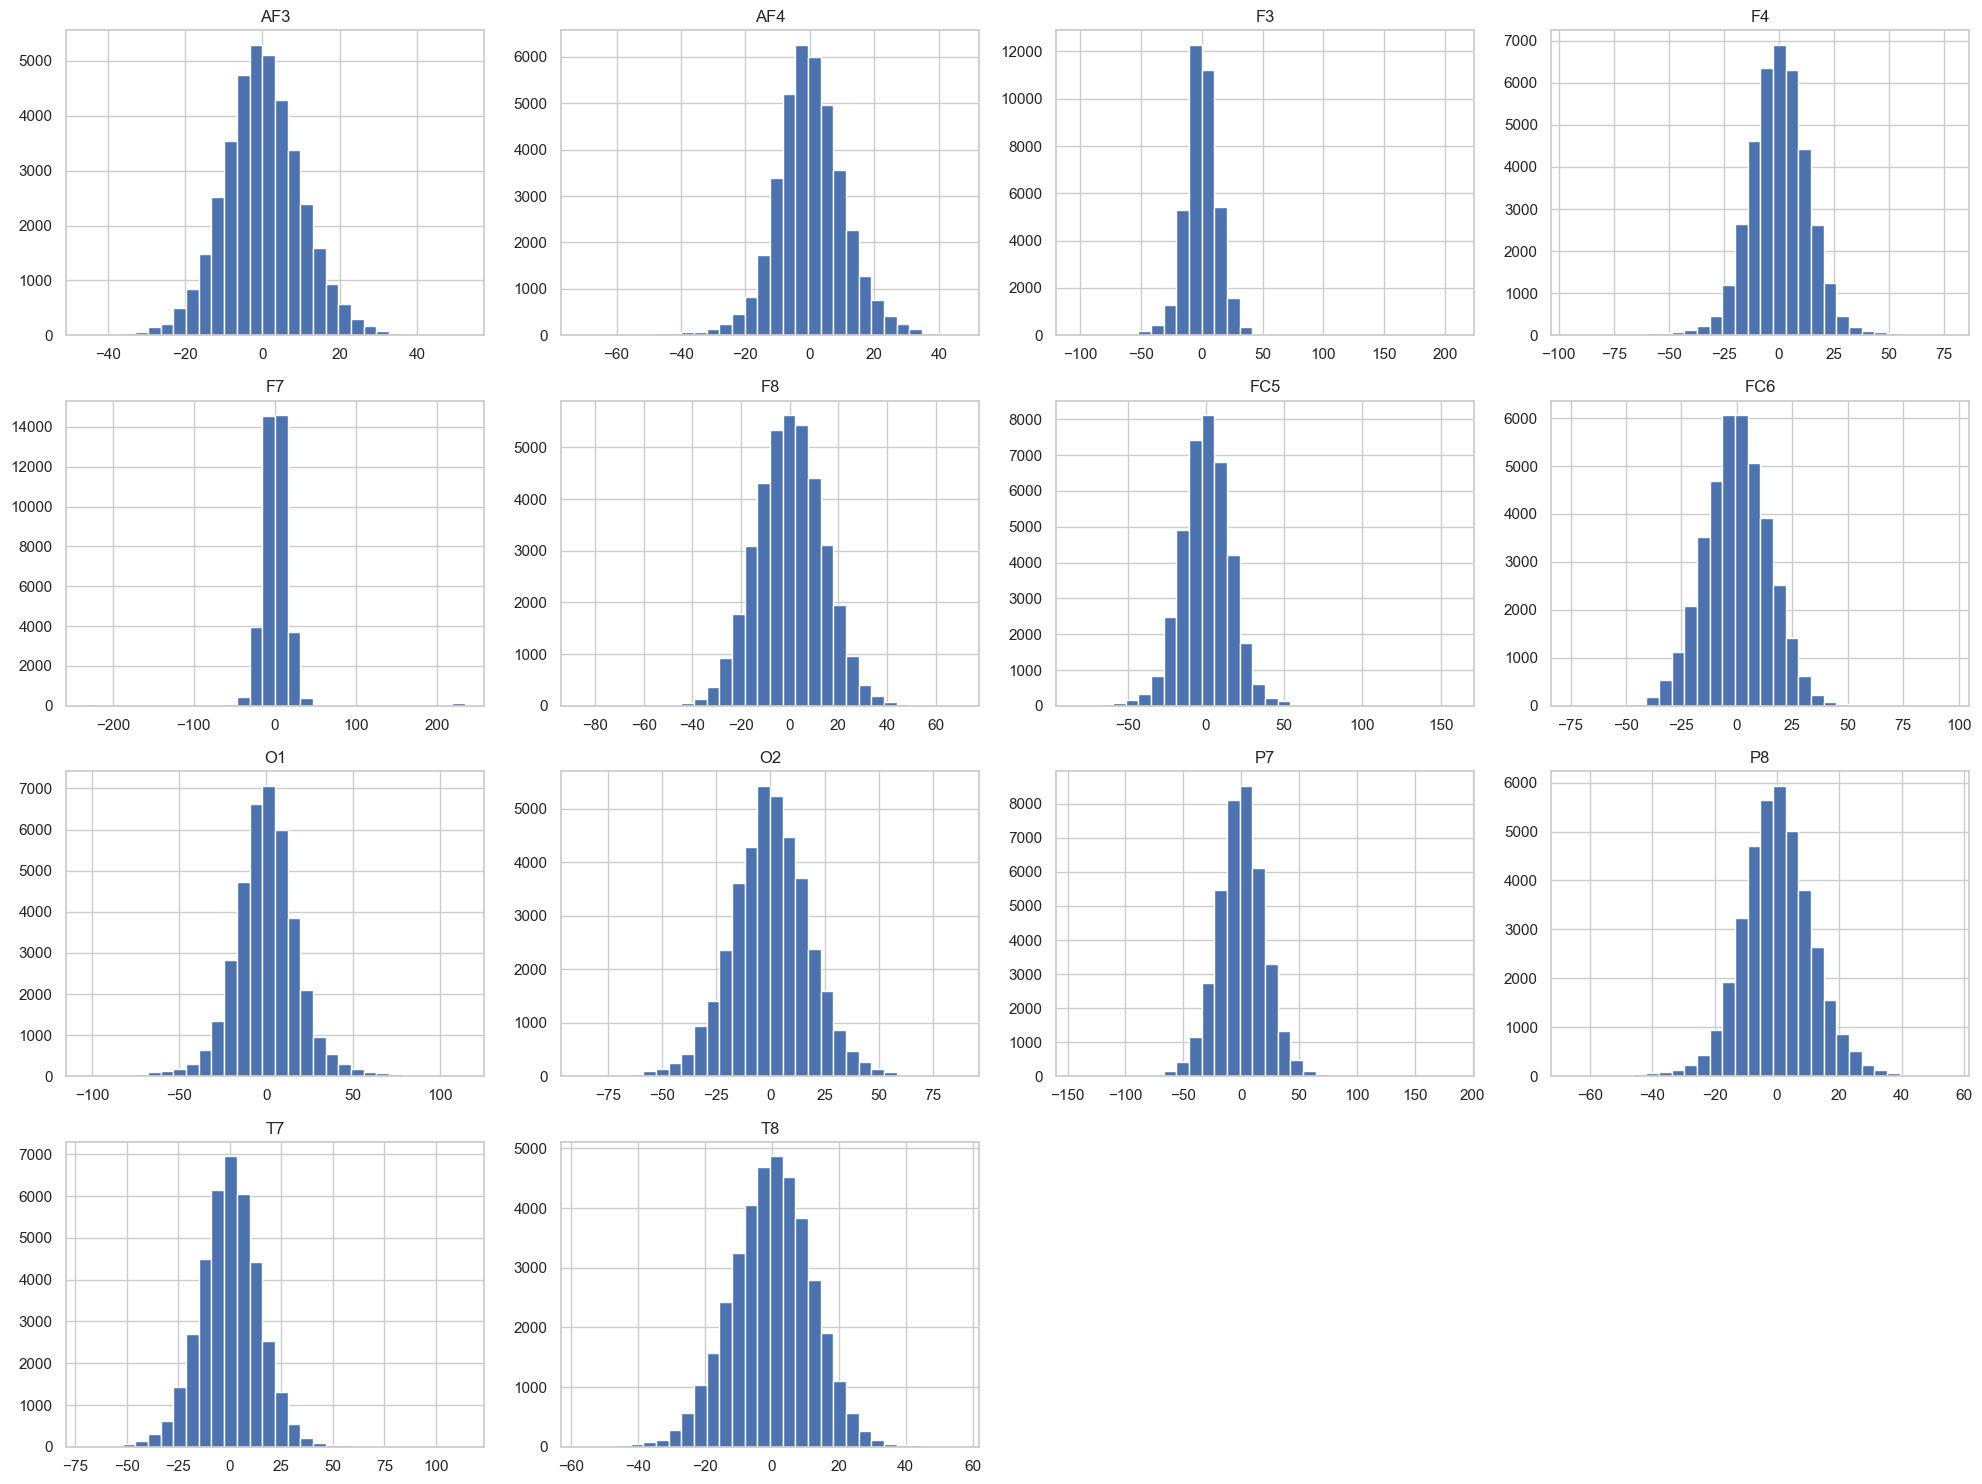

In [16]:
sns.set(style="whitegrid")
data.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

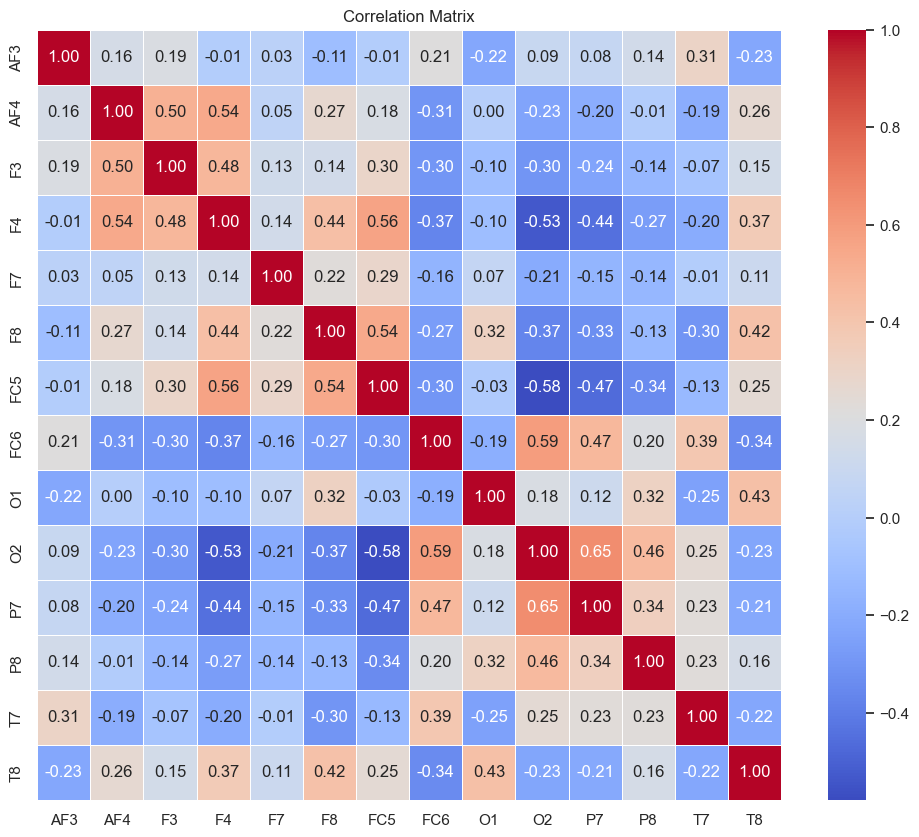

In [17]:
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

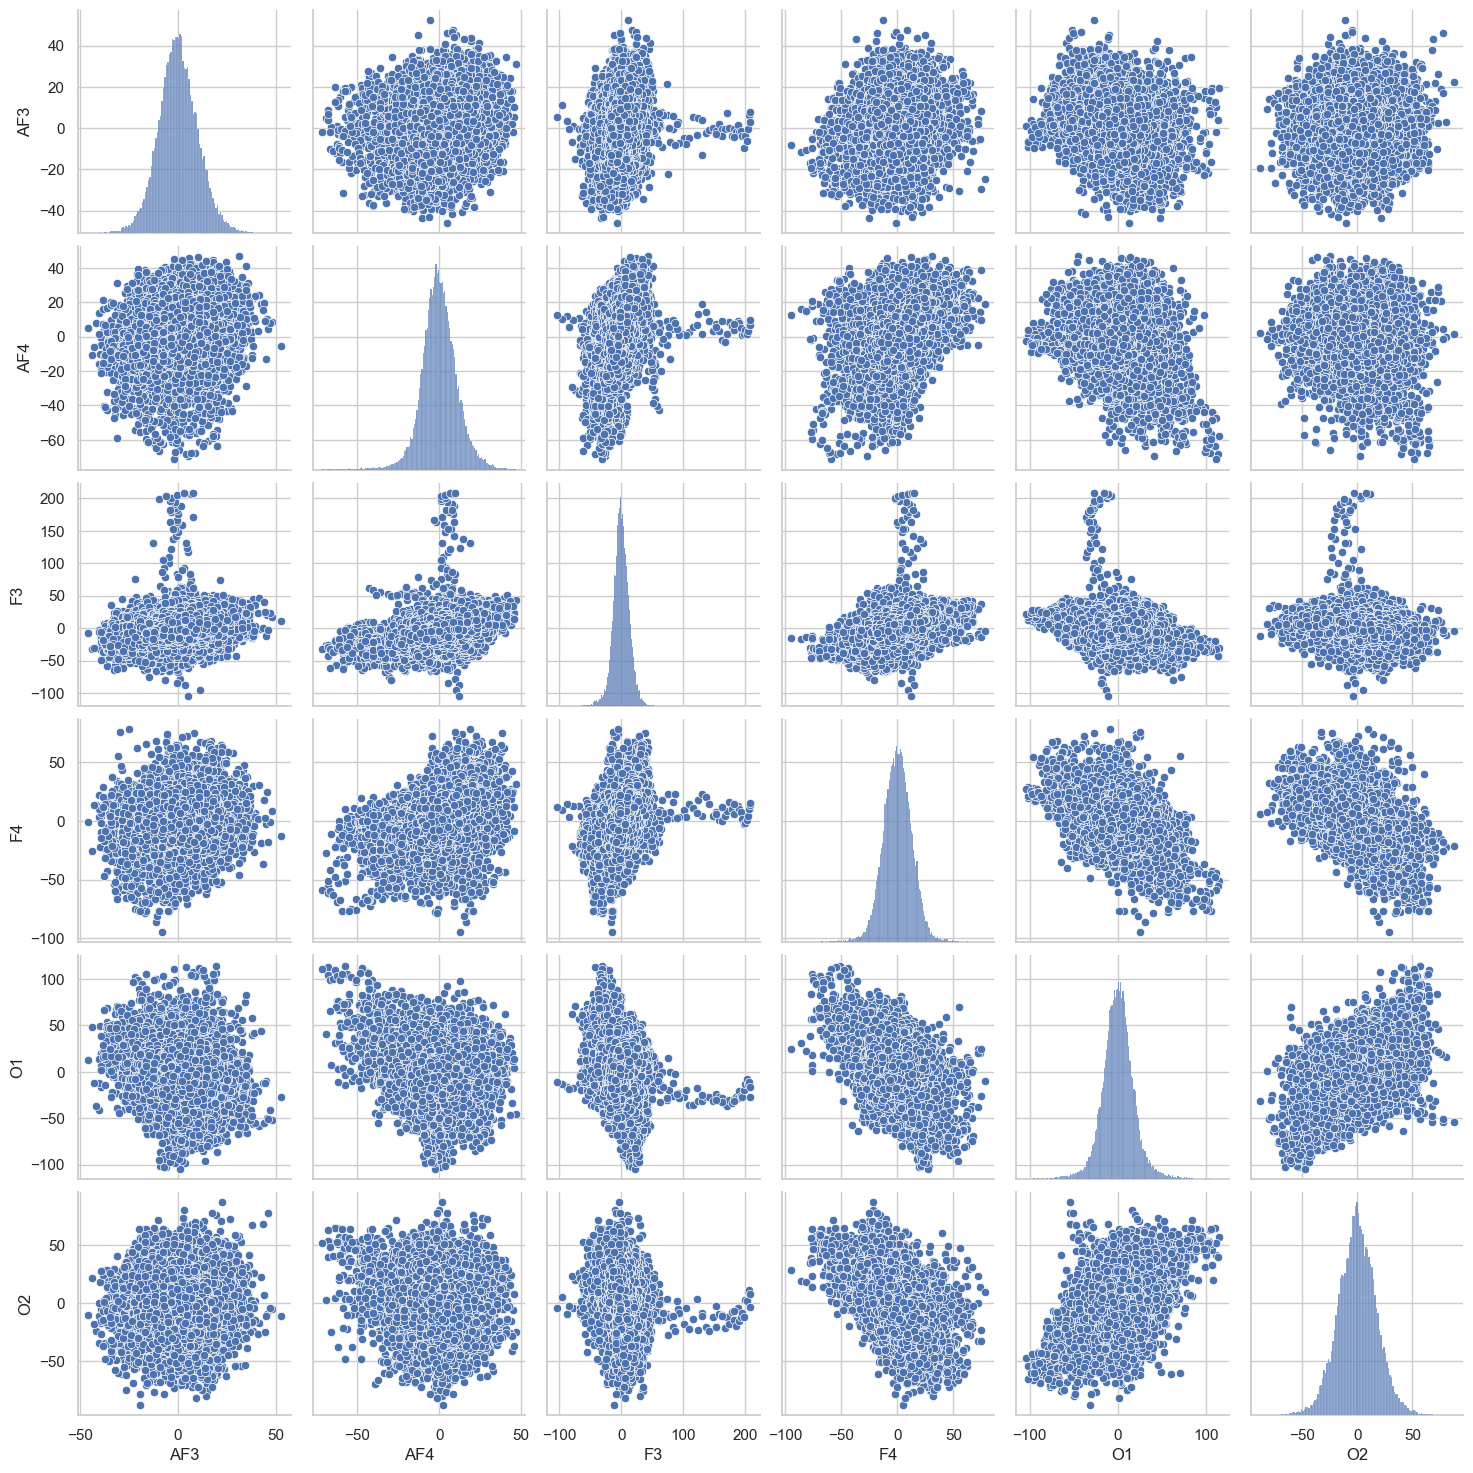

In [18]:
sns.pairplot(data[['AF3', 'AF4', 'F3', 'F4', 'O1', 'O2']])
plt.show()

# Organize data
Create table by subject, game, and file path to EEG data

In [19]:
# 'camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G1AllRawChannels.csv'
data_list = []

for subject in range(28):
    subject = subject + 1
    if subject < 10:
        subject = f"0{subject}" 
    for game in range(4):
        arr = [subject, game + 1, f"camp_qmind/archive/data/data/GAMEEMO/(S{subject})/Raw EEG Data/.csv format/S{subject}G{game+1}AllRawChannels.csv"]
        data_list.append(arr)

data_list

[['01',
  1,
  'camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G1AllRawChannels.csv'],
 ['01',
  2,
  'camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G2AllRawChannels.csv'],
 ['01',
  3,
  'camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G3AllRawChannels.csv'],
 ['01',
  4,
  'camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw EEG Data/.csv format/S01G4AllRawChannels.csv'],
 ['02',
  1,
  'camp_qmind/archive/data/data/GAMEEMO/(S02)/Raw EEG Data/.csv format/S02G1AllRawChannels.csv'],
 ['02',
  2,
  'camp_qmind/archive/data/data/GAMEEMO/(S02)/Raw EEG Data/.csv format/S02G2AllRawChannels.csv'],
 ['02',
  3,
  'camp_qmind/archive/data/data/GAMEEMO/(S02)/Raw EEG Data/.csv format/S02G3AllRawChannels.csv'],
 ['02',
  4,
  'camp_qmind/archive/data/data/GAMEEMO/(S02)/Raw EEG Data/.csv format/S02G4AllRawChannels.csv'],
 ['03',
  1,
  'camp_qmind/archive/data/data/GAMEEMO/(S03)/Raw EEG Data/.csv format/S03G1AllRawChannels.csv'],
 

In [20]:

df = pd.DataFrame(data_list, columns = ['Subject', 'Game', 'Path']) 
df

,Subject,Game,Path
0,01,1,camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw...
1,01,2,camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw...
2,01,3,camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw...
3,01,4,camp_qmind/archive/data/data/GAMEEMO/(S01)/Raw...
4,02,1,camp_qmind/archive/data/data/GAMEEMO/(S02)/Raw...
...,...,...,...
107,27,4,camp_qmind/archive/data/data/GAMEEMO/(S27)/Raw...
108,28,1,camp_qmind/archive/data/data/GAMEEMO/(S28)/Raw...
109,28,2,camp_qmind/archive/data/data/GAMEEMO/(S28)/Raw...
110,28,3,camp_qmind/archive/data/data/GAMEEMO/(S28)/Raw...


In [28]:
# Define emotions for each game
game_emotions = {
    1: 'calm',      # G1
    2: 'boring',    # G2
    3: 'funny',     # G3
    4: 'horror'     # G4
}

def create_windows(df, window_size=100, step_size=50):
    windows = []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size].values.flatten()
        windows.append(window)
    return np.array(windows)

all_data = []
all_labels = []

# Iterate over each subject and each game
for subject in range(1, 29):  # 28 subjects
    subject_str = f"{subject:02d}"  # Format subject number with leading zero
    for game in range(1, 5):  # 4 games
        # Construct the file path
        #path = f"D:\\eegdat\\eeg\\Dataset - Emotion Recognition data Based on EEG Signals and Computer Games\\Database for Emotion Recognition System Based on EEG Signals and Various Computer Games - GAMEEMO\\GAMEEMO\\(S{subject_str})\\Preprocessed EEG Data\\.csv format\\S{subject_str}G{game}AllChannels.csv"    
        path = rf"C:\eeg\Dataset - Emotion Recognition data Based on EEG Signals and Computer Games\Database for Emotion Recognition System Based on EEG Signals and Various Computer Games - GAMEEMO\GAMEEMO\(S{subject_str})\Preprocessed EEG Data\.csv format\S{subject_str}G{game}AllChannels.csv"
   
        try:
            # Load data for each game
            game_data = pd.read_csv(path)
            game_data = game_data.drop(columns=['Unnamed: 14'])
            game_data = game_data.fillna(method='ffill')
            
            # Create windows for this game
            windows = create_windows(game_data)
            
            # Create emotion labels for all windows from this game
            labels = [game_emotions[game]] * len(windows)
            
            all_data.append(windows)
            all_labels.extend(labels)
            print(f"Successfully loaded game {game} for subject {subject_str}")
        except FileNotFoundError:
            print(f"Could not find file for game {game} for subject {subject_str}")
            continue

# Only proceed if we have data
if all_data:
    # Combine all data
    X = np.vstack(all_data)
    y = np.array(all_labels)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)

    # Make predictions
    y_pred = rf_model.predict(X_test)

    # Print classification report
    print("\nEmotion Classification Report:")
    print(classification_report(y_test, y_pred))

    # Create confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=game_emotions.values(),
                yticklabels=game_emotions.values())
    plt.title('Confusion Matrix for Emotion Classification')
    plt.ylabel('True Emotion')
    plt.xlabel('Predicted Emotion')
    plt.show()

    # Feature importance by channel
    feature_importance = rf_model.feature_importances_
    feature_importance = feature_importance.reshape(-1, 14)
    feature_importance = np.mean(feature_importance, axis=0)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    channel_names = ['AF3', 'AF4', 'F3', 'F4', 'F7', 'F8', 'FC5', 'FC6', 'O1', 'O2', 'P7', 'P8', 'T7', 'T8']
    plt.bar(channel_names, feature_importance)
    plt.title('Average Feature Importance by Channel')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data was loaded. Please check the file paths.")

C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 01
Successfully loaded game 2 for subject 01


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 01


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 01


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 02


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 02


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 02


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 02
Successfully loaded game 1 for subject 03


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 03


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 03


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 03
Successfully loaded game 1 for subject 04


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 04
Successfully loaded game 3 for subject 04


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 04


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 05


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 05
Successfully loaded game 3 for subject 05


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 05
Successfully loaded game 1 for subject 06


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 06


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 06


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 06


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 07


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 07


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 07


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 07


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 08


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 08


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 08


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 08


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 09


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 09


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 09


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 09


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 10
Successfully loaded game 2 for subject 10


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 10
Successfully loaded game 4 for subject 10


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 11


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 11


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 11
Successfully loaded game 4 for subject 11


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 12
Successfully loaded game 2 for subject 12
Successfully loaded game 3 for subject 12


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 12


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 13
Successfully loaded game 2 for subject 13


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 13
Successfully loaded game 4 for subject 13


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 14
Successfully loaded game 2 for subject 14


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 14
Successfully loaded game 4 for subject 14


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 15
Successfully loaded game 2 for subject 15
Successfully loaded game 3 for subject 15


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 15


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 16
Successfully loaded game 2 for subject 16


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 16
Successfully loaded game 4 for subject 16


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 17


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 17


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 17
Successfully loaded game 4 for subject 17


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 18


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 18


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 18


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 18


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 19
Successfully loaded game 2 for subject 19


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 19


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 19


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 20


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 20


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 20
Successfully loaded game 4 for subject 20


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 21
Successfully loaded game 2 for subject 21


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 21


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 21


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 22
Successfully loaded game 2 for subject 22


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 22
Successfully loaded game 4 for subject 22
Successfully loaded game 1 for subject 23


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 23
Successfully loaded game 3 for subject 23


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 23


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 1 for subject 24


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 24
Successfully loaded game 3 for subject 24


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 24
Successfully loaded game 1 for subject 25


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 25
Successfully loaded game 3 for subject 25


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 25
Could not find file for game 1 for subject 26
Could not find file for game 2 for subject 26
Could not find file for game 3 for subject 26
Could not find file for game 4 for subject 26
Successfully loaded game 1 for subject 27


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 27
Successfully loaded game 3 for subject 27


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')
C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 27
Successfully loaded game 1 for subject 28


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 2 for subject 28


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 3 for subject 28


C:\Users\colin\AppData\Local\Temp\ipykernel_7440\3072347134.py:31: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')


Successfully loaded game 4 for subject 28


KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import os

game_emotions = {1: 'calm', 2: 'boring', 3: 'funny', 4: 'horror'}

# Function to create windows
def create_windows(df, window_size=100, step_size=50):
    windows = []
    for i in range(0, len(df) - window_size + 1, step_size):
        window = df.iloc[i:i + window_size].values
        windows.append(window)
    return np.array(windows)

# For preprocessing and windowing...
all_data = []
all_labels = []

for subject in range(1, 29):
    subject_str = f"{subject:02d}"
    for game in range(1, 5):
        path = rf"C:\eeg\Dataset - Emotion Recognition data Based on EEG Signals and Computer Games\Database for Emotion Recognition System Based on EEG Signals and Various Computer Games - GAMEEMO\GAMEEMO\(S{subject_str})\Preprocessed EEG Data\.csv format\S{subject_str}G{game}AllChannels.csv"
        try:
            # Load data
            game_data = pd.read_csv(path)
            game_data = game_data.drop(columns=['Unnamed: 14'], errors='ignore')
            game_data = game_data.fillna(method='ffill')  # Fill missing values
            
            # Normalize data - VERY IMPORTANT STEP!!!
            game_data = (game_data - game_data.mean()) / game_data.std()
            
            # Create windows
            windows = create_windows(game_data)  # Shape: [num_windows, 100, 14]
            labels = [game_emotions[game]] * len(windows)  # Same label for all windows
            
            all_data.append(windows)
            all_labels.extend(labels)
            print(f"Loaded game {game} for subject {subject_str}")
        except FileNotFoundError:
            print(f"File not found: Subject {subject_str}, Game {game}")
            continue

# Combine data
if all_data:
    X = np.concatenate(all_data, axis=0).reshape(-1, 100, 14, 1)  # Add channel dimension
    y = np.array(all_labels)

    # Encode labels
    le = LabelEncoder()
    y = le.fit_transform(y)
    y = to_categorical(y)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # CNN Model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 14, 1)),  # Extract low-level features
        layers.MaxPooling2D((2, 2)),  # Down-sampling
        layers.Conv2D(64, (3, 3), activation='relu'),  # Extract more complex features
        layers.MaxPooling2D((2, 2)),  # Down-sampling again
        layers.Flatten(),  # Flatten feature map for classification --> from 2D feature map to 1D vector
        layers.Dense(64, activation='relu'),  # Intermediate layer for complex relationships
        layers.Dropout(0.3),  # Regularization to prevent overfitting
        layers.Dense(4, activation='softmax')  # Final classification
    ])

    # Compile and train model with data
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

    # Evaluate model accuracy
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_accuracy}")
else:
    print("No data was loaded. Please check the file paths.")


<>:21: SyntaxWarning: invalid escape sequence '\e'
<>:21: SyntaxWarning: invalid escape sequence '\e'
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:21: SyntaxWarning: invalid escape sequence '\e'
  """
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 01
Loaded game 2 for subject 01
Loaded game 3 for subject 01


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 01
Loaded game 1 for subject 02
Loaded game 2 for subject 02


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 02
Loaded game 4 for subject 02
Loaded game 1 for subject 03


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 03
Loaded game 3 for subject 03


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 03
Loaded game 1 for subject 04
Loaded game 2 for subject 04


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 04
Loaded game 4 for subject 04
Loaded game 1 for subject 05
Loaded game 2 for subject 05
Loaded game 3 for subject 05


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 05
Loaded game 1 for subject 06
Loaded game 2 for subject 06


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 06
Loaded game 4 for subject 06
Loaded game 1 for subject 07


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 07
Loaded game 3 for subject 07


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 07
Loaded game 1 for subject 08
Loaded game 2 for subject 08


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 08
Loaded game 4 for subject 08
Loaded game 1 for subject 09


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 09
Loaded game 3 for subject 09
Loaded game 4 for subject 09


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 10
Loaded game 2 for subject 10
Loaded game 3 for subject 10


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 10
Loaded game 1 for subject 11
Loaded game 2 for subject 11


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 11
Loaded game 4 for subject 11
Loaded game 1 for subject 12


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 12
Loaded game 3 for subject 12
Loaded game 4 for subject 12


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 13
Loaded game 2 for subject 13


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 13
Loaded game 4 for subject 13
Loaded game 1 for subject 14


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 14
Loaded game 3 for subject 14
Loaded game 4 for subject 14


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 15
Loaded game 2 for subject 15
Loaded game 3 for subject 15


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 15
Loaded game 1 for subject 16
Loaded game 2 for subject 16


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 16
Loaded game 4 for subject 16
Loaded game 1 for subject 17


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 17
Loaded game 3 for subject 17
Loaded game 4 for subject 17


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 18
Loaded game 2 for subject 18
Loaded game 3 for subject 18


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 18
Loaded game 1 for subject 19
Loaded game 2 for subject 19


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 19
Loaded game 4 for subject 19
Loaded game 1 for subject 20


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 20
Loaded game 3 for subject 20
Loaded game 4 for subject 20


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 21
Loaded game 2 for subject 21


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 21
Loaded game 4 for subject 21
Loaded game 1 for subject 22


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 22
Loaded game 3 for subject 22
Loaded game 4 for subject 22


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 23
Loaded game 2 for subject 23
Loaded game 3 for subject 23


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 23
Loaded game 1 for subject 24
Loaded game 2 for subject 24


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 24
Loaded game 4 for subject 24
Loaded game 1 for subject 25


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 2 for subject 25
Loaded game 3 for subject 25
Loaded game 4 for subject 25
File not found: Subject 26, Game 1
File not found: Subject 26, Game 2
File not found: Subject 26, Game 3
File not found: Subject 26, Game 4


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 1 for subject 27
Loaded game 2 for subject 27
Loaded game 3 for subject 27


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 4 for subject 27
Loaded game 1 for subject 28
Loaded game 2 for subject 28


C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values
C:\Users\colin\AppData\Local\Temp\ipykernel_15288\1573018015.py:69: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  game_data = game_data.fillna(method='ffill')  # Fill missing values


Loaded game 3 for subject 28
Loaded game 4 for subject 28


c:\Users\colin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.3690 - loss: 1.2819 - val_accuracy: 0.7065 - val_loss: 0.7513
Epoch 2/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.7189 - loss: 0.7013 - val_accuracy: 0.8428 - val_loss: 0.4284
Epoch 3/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 32s 16ms/step - accuracy: 0.8329 - loss: 0.4463 - val_accuracy: 0.8757 - val_loss: 0.3413
Epoch 4/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 35s 17ms/step - accuracy: 0.8764 - loss: 0.3381 - val_accuracy: 0.8939 - val_loss: 0.2903
Epoch 5/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.8985 - loss: 0.2733 - val_accuracy: 0.9287 - val_loss: 0.2038
Epoch 6/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9163 - loss: 0.2293 - val_accuracy: 0.9182 - val_loss: 0.2268
Epoch 7/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 34s 16ms/step - accuracy: 0.9224 - loss: 0.2115 - val_accuracy: 0.9297 - val_loss: 0.2000
Epoch 8/10
2063/2063 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.9293 -